# Модель логистического поведения

## Дискретное отображение

Можно выразить рекурентной формулой


$${\displaystyle x_{n+1}=rx_{n}(1-x_{n})}$$

Представленное ниже отображение показывает значения между которыми колеблится $x_i$ при определенных значениях $r$

In [ ]:
import pylab as plt

def show(x, y, xleg, yleg):
    plt.plot(x, y)
    plt.xlabel(xleg, fontsize=17)
    plt.ylabel(yleg, fontsize=17)
    
    return plt.show()

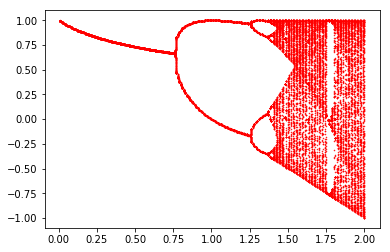

In [41]:
from math import *

x = 0.01
r = 0.01

s = []
c = []

for j in range(200):
    for i in range(200):
        x = 1 - r * x**2
        s.append(x)
        c.append(r)
    r += 0.01

plt.plot(c, s, 'r.', ms=1)
plt.show()

Несколько примеров колебаний 

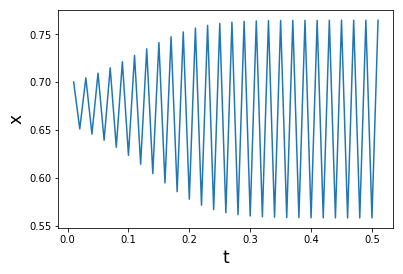

In [47]:
# Между двумя значениями

x = [0.7]
t = [0.01]
r = 3.1

for i in range(50):
    x.append(r*x[-1]*(1-x[-1]))
    t.append(t[-1]+0.01)
    
show(t, x, 't', 'x')

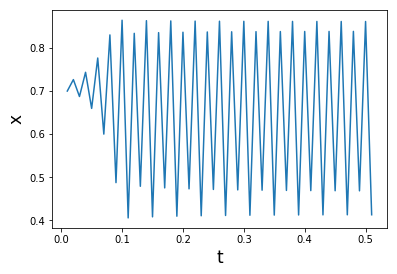

In [46]:
# Между 4 значениями

x = [0.7]
t = [0.01]
r = 3.46

for i in range(50):
    x.append(r*x[-1]*(1-x[-1]))
    t.append(t[-1]+0.01)
    
show(t, x, 't', 'x')

## Логистическое уравнение

$ {\frac  {dP}{dt}}=rP\left(1-{\frac  {P}{K}}\right) $

Аналитическое решение

$ P(t)={\frac  {KP_{0}e^{{rt}}}{K+P_{0}\left(e^{{rt}}-1\right)}} $

где

$ {\displaystyle \lim _{t\to \infty }P(t)=K.} $

In [33]:
from scipy.integrate import odeint

def get_f(r=1, k=1):
    def f(x, y):
        return r * x * (1 - (x/k))
    
    return f

Нормальный рост

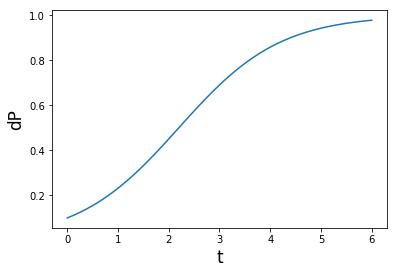

In [32]:
t = [0.1*i for i in range(61)]
p0 = [0.1]
    
dp = odeint(get_f(r=1,k=1), p0, t)

show(t, dp, 't', 'dP')

Рост с начальным "избытком ресурсов", примерно до t=3 похоже на экпоненциальный рост 

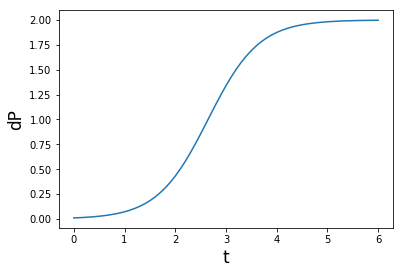

In [31]:
t = [0.1*i for i in range(61)]
p0 = [0.01]
    
dp = odeint(get_f(r=2,k=2), p0, t)

show(t, dp, 't', 'dP')

Деградация с "недостатком ресурсов"

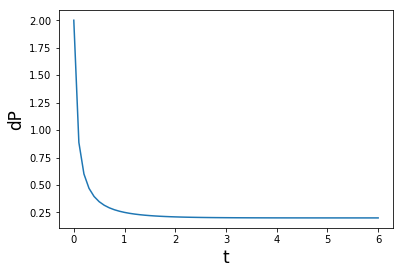

In [29]:
t = [0.1*i for i in range(61)]
p0 = [2]
    
dp = odeint(get_f(r=1.5,k=0.2), p0, t)

show(t, dp, 't', 'dP')